In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.decomposition, sklearn.manifold
import umap

import sys
sys.path.append('..')
from lib import *
plt.style.use('../peptidome.mplstyle')

In [2]:
data = np.load('data/data.npz')

aa_human = data['human']
aa_viruses = data['viruses']
aa_viruses = aa_viruses[np.random.randint(0, len(aa_viruses), len(aa_human))]
print(aa_viruses.shape, aa_human.shape)

(20111, 20) (20111, 20)


In [62]:
samples = np.vstack([aa_human, aa_viruses])
sample_origins = np.concatenate([np.ones(aa_human.shape[0]), 2*np.ones(aa_viruses.shape[0])])
indices = np.random.randint(0, samples.shape[0], 5000)
samples = samples[indices]
sample_origins = sample_origins[indices]

In [73]:
transformed_dict = {}
for label, reducer in [('pca', sklearn.decomposition.PCA(n_components=2)),
                       ('umap', umap.UMAP(n_components=2, n_neighbors=10)),
                       ('tsne', sklearn.manifold.TSNE(n_components=2, init='pca'))]:
    transformed_dict[label] = reducer.fit_transform(samples)

/home/amayer/.conda/envs/py3/lib/python3.6/site-packages/numba/typed_passes.py:271: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../.conda/envs/py3/lib/python3.6/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))


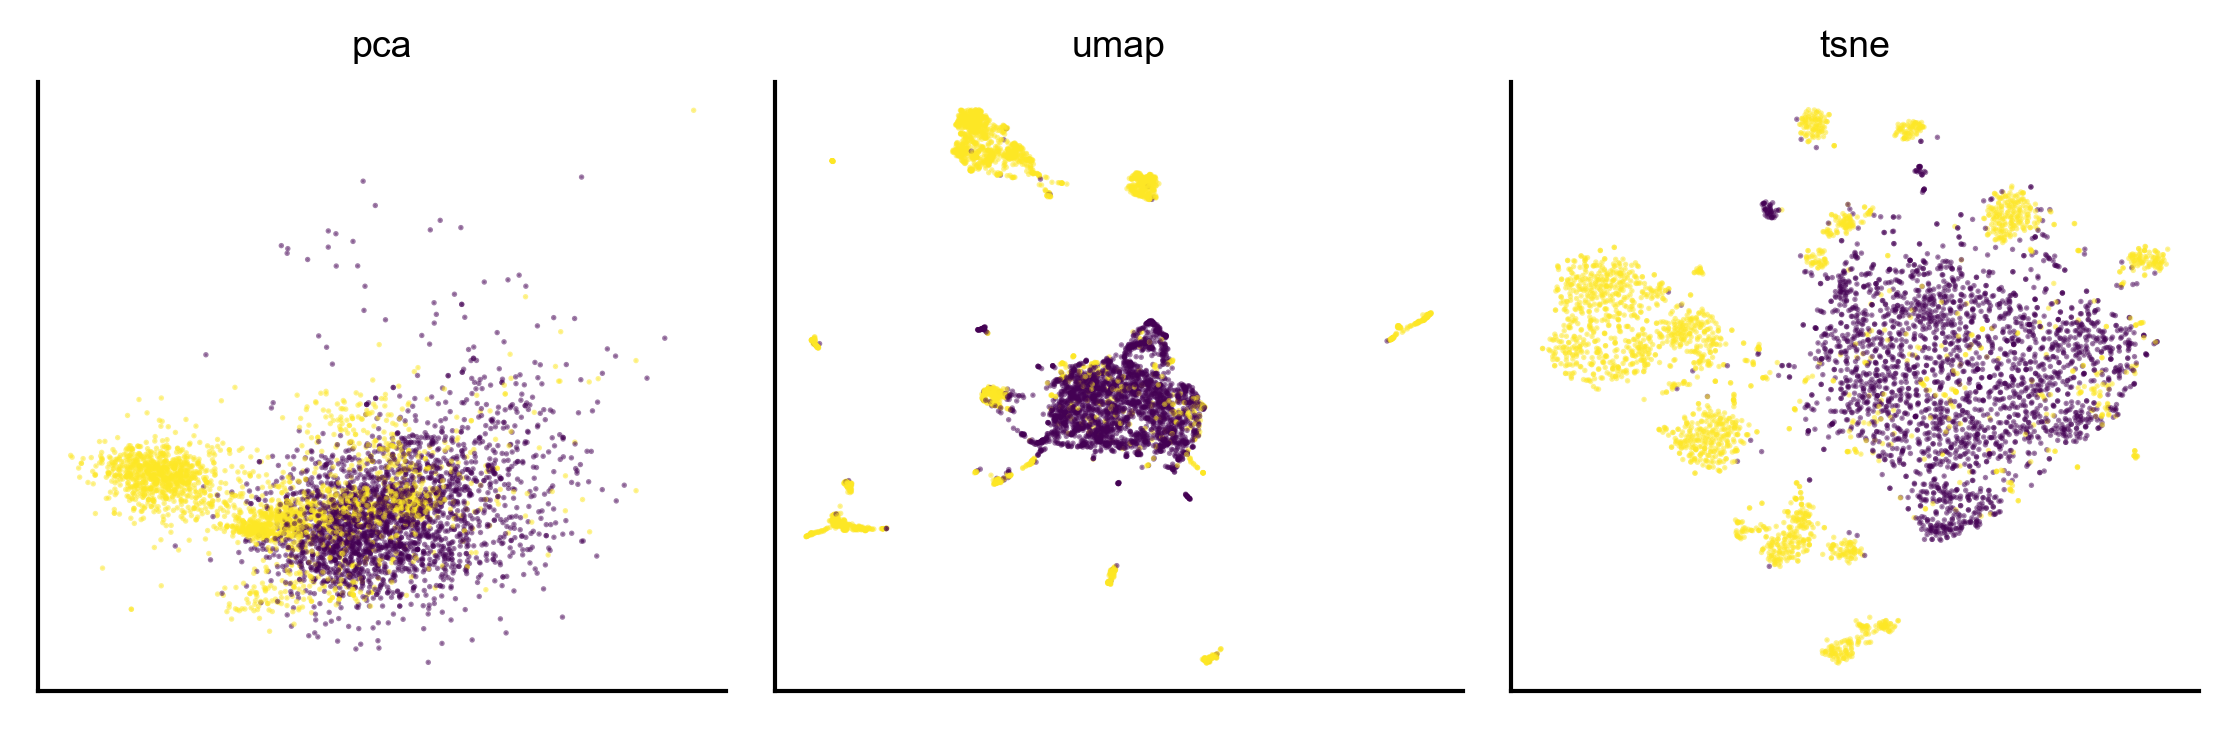

In [78]:
fig, axes = plt.subplots(figsize=(7.5, 2.5), ncols=3, sharex=False, sharey=False)
for i, label in enumerate(transformed_dict.keys()):
    transformed = transformed_dict[label]
    axes[i].scatter(transformed[:, 0], transformed[:, 1], c=sample_origins, cmap='viridis', s=.25, alpha=.5)
    axes[i].set_title(label)
    axes[i].set_xticks([])
    axes[i].set_yticks([])
fig.tight_layout()
fig.savefig('nonlinear_embedding.png')